In [18]:
%load_ext autoreload
%autoreload 2

import numpy as np
from sklearn.model_selection import train_test_split
from src.utils import load_dataset
from src.main import feature_extractor, feature_extractor_fusion, train
from src.visualization import visualize_features


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
np.random.seed(42)

dataset, labels = load_dataset("./dataset/train")
img_train, img_test, label_train, label_test = train_test_split(dataset, labels, test_size=0.2, random_state=42, stratify=labels)
color_feature_extractor, shape_feature_extractor = feature_extractor(img_train)

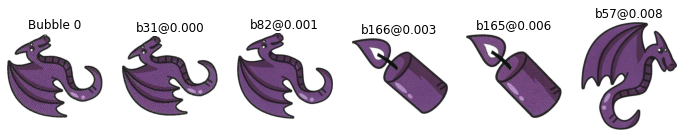

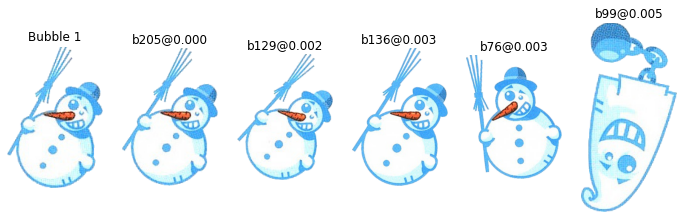

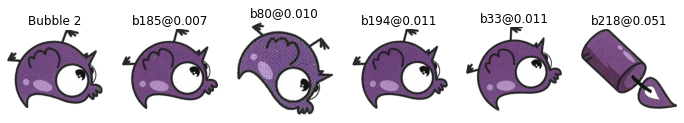

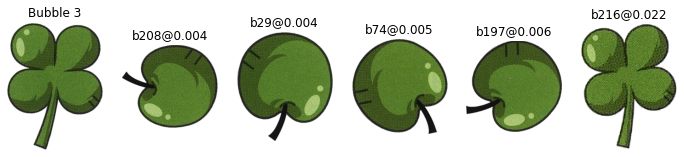

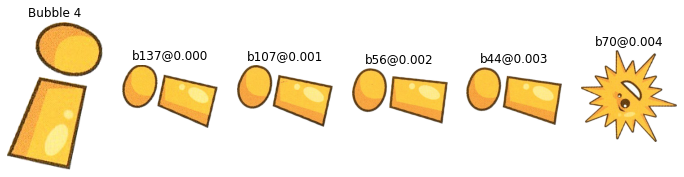

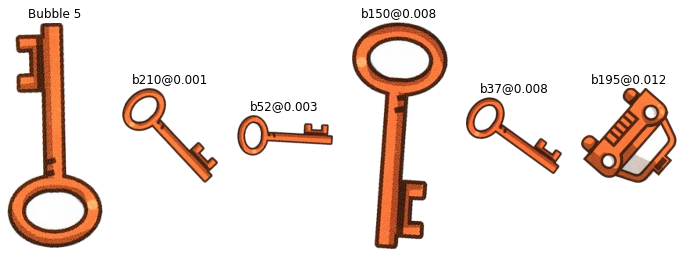

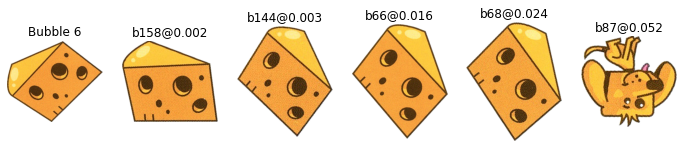

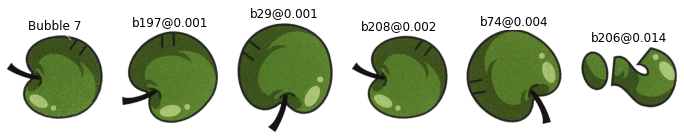

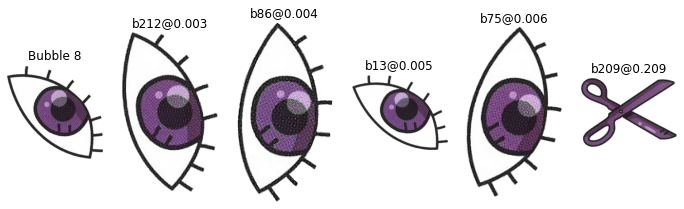

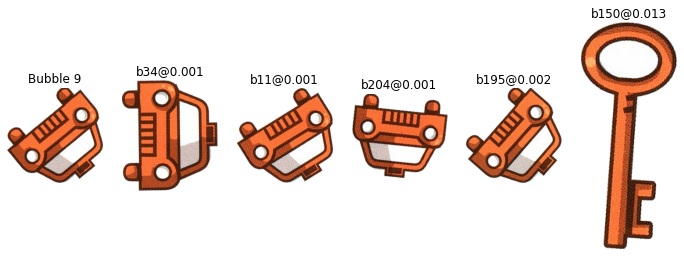

In [13]:
visualize_features(color_feature_extractor, img_train, img_test)

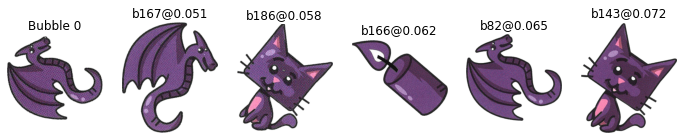

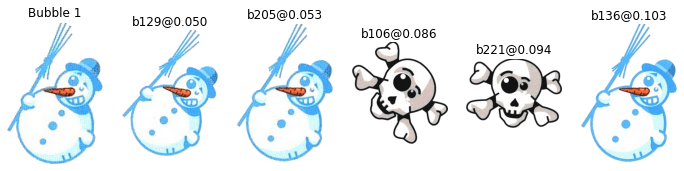

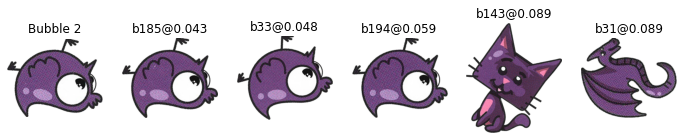

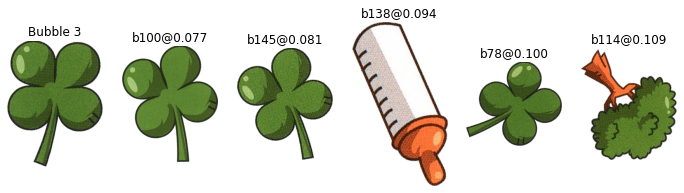

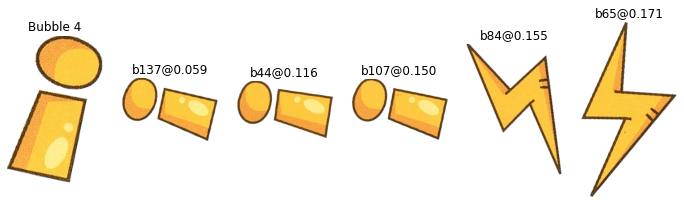

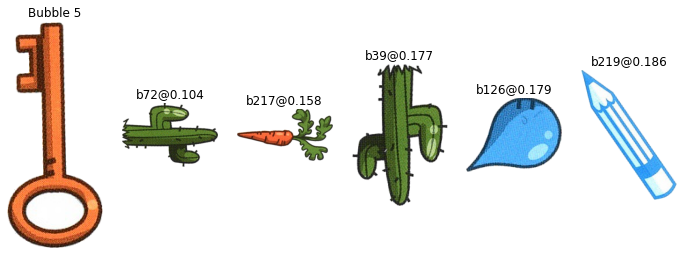

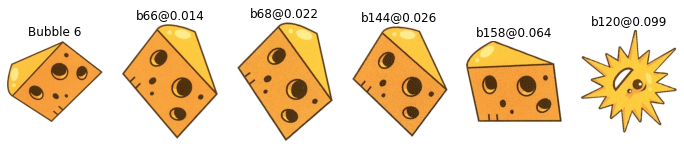

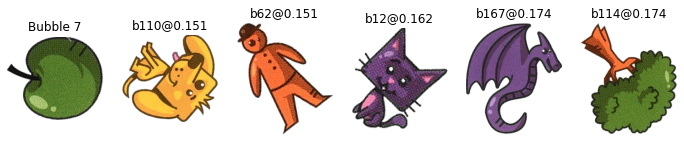

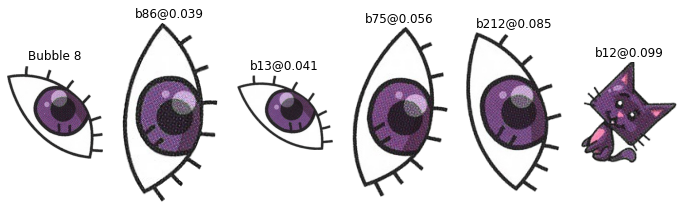

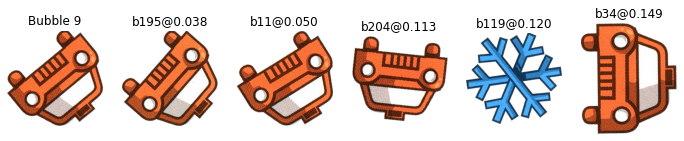

In [14]:
visualize_features(shape_feature_extractor, img_train, img_test)

[0.01171388 0.04511091 0.         0.62449115 0.         0.
 0.19307136 0.         0.         0.         0.         0.01038465
 0.         0.         0.         0.         0.         0.00648002
 0.03248318 0.         0.06355404 0.         0.01271081 0.        ] [0.065 0.005 0.    0.005 0.005 0.055 0.    0.015 0.01  0.    0.    0.
 0.    0.    0.    0.    0.    0.005 0.    0.005 0.005 0.    0.    0.   ]
[0.21439901 0.01303358 0.         0.06758155 0.         0.
 0.00593063 0.         0.         0.         0.         0.14681746
 0.         0.         0.         0.         0.         0.36266464
 0.16295428 0.         0.01586098 0.         0.01075788 0.        ] [0.04  0.05  0.02  0.05  0.07  0.08  0.08  0.03  0.055 0.055 0.035 0.02
 0.075 0.07  0.08  0.05  0.025 0.075 0.005 0.115 0.03  0.08  0.07  0.015]


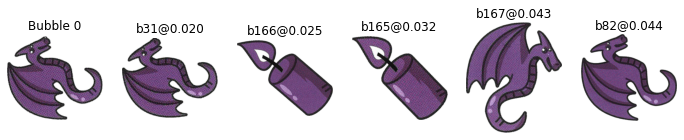

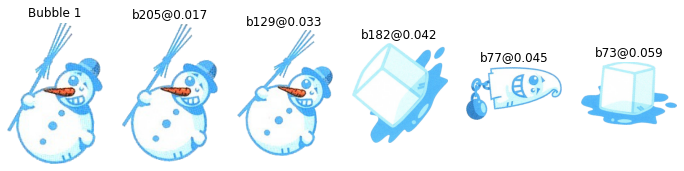

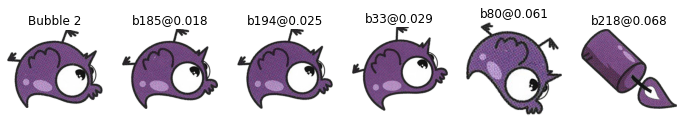

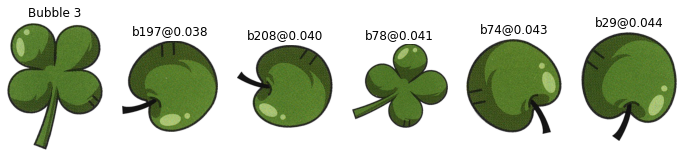

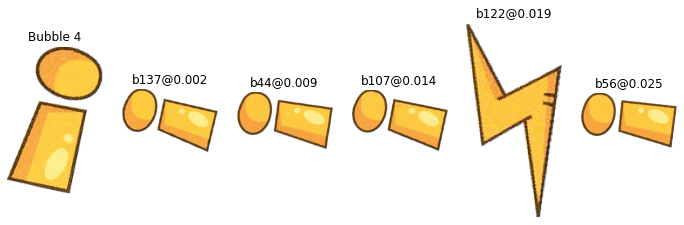

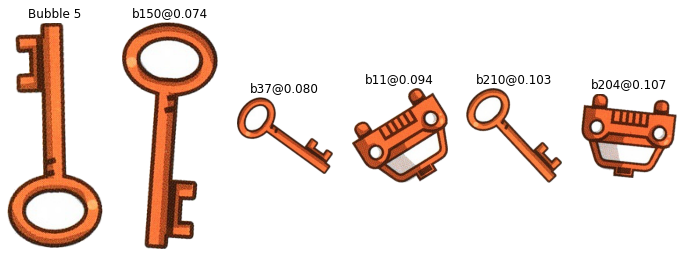

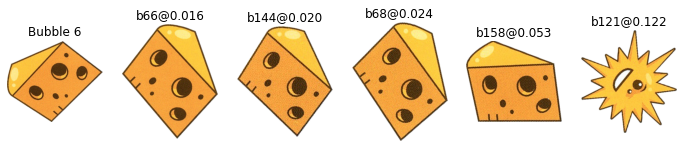

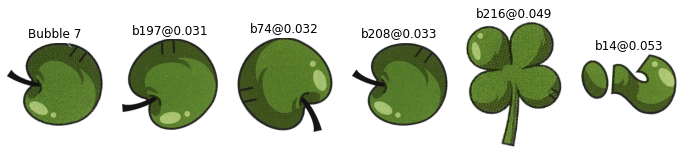

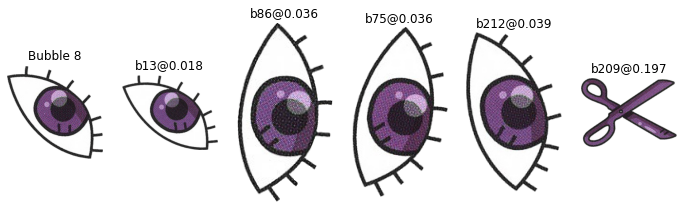

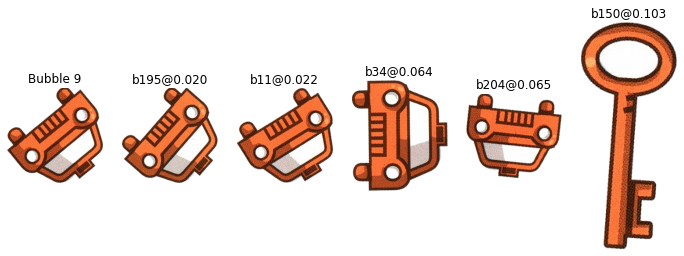

In [15]:
fused_feature_extractor = feature_extractor_fusion(color_feature_extractor, shape_feature_extractor)
visualize_features(fused_feature_extractor, img_train, img_test)

In [22]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

clf = KNeighborsClassifier(n_neighbors=1)

train(clf, fused_feature_extractor(img_train), label_train)

fig = plt.figure(dpi=3)
ax = fig.add_subplot(111)

plot_confusion_matrix(clf, fused_feature_extractor(img_test), label_test, ax=ax)



[0.01171388 0.04511091 0.         0.62449115 0.         0.
 0.19307136 0.         0.         0.         0.         0.01038465
 0.         0.         0.         0.         0.         0.00648002
 0.03248318 0.         0.06355404 0.         0.01271081 0.        ] [0.065 0.005 0.    0.005 0.005 0.055 0.    0.015 0.01  0.    0.    0.
 0.    0.    0.    0.    0.    0.005 0.    0.005 0.005 0.    0.    0.   ]
[0.21439901 0.01303358 0.         0.06758155 0.         0.
 0.00593063 0.         0.         0.         0.         0.14681746
 0.         0.         0.         0.         0.         0.36266464
 0.16295428 0.         0.01586098 0.         0.01075788 0.        ] [0.04  0.05  0.02  0.05  0.07  0.08  0.08  0.03  0.055 0.055 0.035 0.02
 0.075 0.07  0.08  0.05  0.025 0.075 0.005 0.115 0.03  0.08  0.07  0.015]


/usr/local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


AttributeError: 'Figure' object has no attribute 'imshow'

RuntimeError: In set_size: Could not set the fontsize (error code 0x97)

<Figure size 18x12 with 1 Axes>